# Segundo examen

<div style="float: right;" markdown="1">
    <img src="https://github.com/restrepo/ComputationalMethods/raw/master/material/figures/leastaction_pendulum.svg?sanitize=true">
</div>
Un observador mirando el movimiento de un péndulo simple con una masa en el extremo de $0.2\ \text{Kg}$ y una longitud  $l=1\ \text{m}$, activa un cronómetro cuando el péndulo, oscilando de izquierda a derecha, se encuentra en su posición vertical. El observador detiene el cronómetro después de un tiempo de $t_f=0.5026\ \text{s}$, justo cuando el péndulo alcanza su máxima altura formando un ángulo de $\theta_0=10^\circ$ con respecto a la vertical. Por lo tanto $t_f=T/4$, donde , donde $T$ es el período de la oscilación del péndulo simple.

1. Minimizando la Acción del péndulo simple, la cual será explicada a continuación,  encuentre la trayectoria angular que describe el extremo del péndulo durante el tiempo de observación: en el plano del ángulo barrido en radianes en función del tiempo esquematizado en la figura. 
2. Grafique dicha trayectoria en plano $\theta(t)$ vs $t$ y compare con la superposición del gráfico de la ecuación de movimiento $\theta(t)=\theta_0 \sin(\omega t)$, donde $\omega$ es la frecuencia angular de la oscilación del péndulo simple, dada por $\omega=2\pi/T$.
3. Compruebe que la trayectoría que minimiza la Acción también conserva la energía total: $E=K+V$, donde $K$ es la energía cinética del péndulo y $V$ es su energía potencial.

## Acción para un péndulo simple

<div style="float: right;" markdown="1">
    <img src="https://github.com/restrepo/ComputationalMethods/raw/master/material/figures/pendulum.png">
</div>
Vamos a tomar como origen del sistema de referencia el extremo inferior del péndulo en su posición vertical. Por lo tanto, la altura del extremo inferior del péndulo a un ángulo $\theta$ com se muestra en la figura, es
$$
y=l-l\cos\theta=l(1-\cos\theta)\,.
$$
Entonces

* Energía potencial
$$
V=mgy=mgl(1-\cos\theta).
$$
* Como la velocidad de la masa es $v=l\dot\theta$, tenemos que la energía cinética es
$$
K=\frac{1}{2}m v^2=\frac{1}{2}ml^2\dot\theta^2\,,
$$
donde $\dot\theta=d\theta/dt\,.$. 

La Lagrangiana, en función de las coordenadas generalizadas $\theta$ y $\dot\theta$ es
$$
L=K-V=\frac{1}{2}ml^2\dot\theta^2-mgl(1-\cos\theta)\,,
$$
y, finalmente, la Acción a minimizar para encontrar la trayectoria física $\theta(t)$, es
$$
S=\int_0^{t_f} L\,\operatorname{d}t\,.
$$

Para los detalles ver: http://www.aoengr.com/Dynamics/LagrangianMechanicsPendulum.pdf

In [0]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

In [0]:
# Se definen las variables de acuerdo con el problema:

m = 0.2                   # Masa
l = 1                     # Longitud de la cuerda del péndulo
ti = 0.0                  # Tiempo inicial
tf = 0.5026               # Tiempo final
ai = 0.0                  # Ángulo inicial
af = np.radians(10)       # Ángulo final 
T = 4*tf                  # Periodo
w = 2*np.pi/T             # Frecuencia angular
g = 9.8                   # Aceleración de la gravedad

In [0]:
# Se define la función que determina la acción para cualquier conjunto de puntos.

def S(X, tend=0.5026, m=0.2, Xini=0., Xend=np.radians(10), g=9.8):
    
    dt = tend/X[:-1].size
    
    X = np.asarray(X)

    X[0] = Xini
    X[-1] = Xend

    return ((0.5*m*l**2*(X[1:]-X[:-1])**2 / dt**2 - m*g*l*(1 - np.cos((X[1:]+X[:-1])/2)))*dt).sum()

In [89]:
# Se minimiza la acción con fmin_powell utilizando ceros como punto de referencia.

Y = np.zeros(20)

mS = optimize.fmin_powell(S, Y, full_output=1)

# Se extraen los valores correspondientes a los ángulos en un arreglo.

A = mS[0]
A[0] = 0
A[-1] = af

# Se determina su correspondiente valor en cada tiempo.

dt = tf/A[:-1].size
t = np.arange(0, tf+dt, dt)

Optimization terminated successfully.
         Current function value: -0.000002
         Iterations: 24
         Function evaluations: 6445


In [112]:
# Mínima acción:

print(mS[1])

-1.9103749166448627e-06


In [90]:
# Se realiza una interpolación cuadrática con los puntos obtenidos.

P = np.poly1d(np.polyfit(t, A, 2))
print(P)

         2
-0.5735 x + 0.6483 x - 0.003529


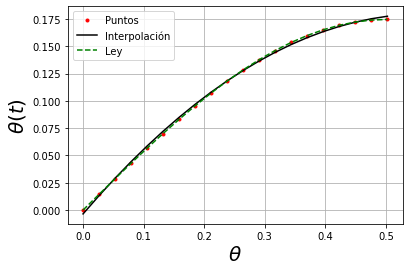

In [113]:
plt.plot(t, A, 'r.', label='Puntos')
plt.plot(t, P(t), 'k-', label='Interpolación')
plt.plot(t, af*np.sin(w*t), 'g--', label='Ley')
plt.xlabel(r'$\theta$',size=20 )
plt.ylabel(r'$\theta(t)$',size=20)
plt.legend()
plt.grid()
plt.show()


In [102]:
# Conservación de la energía.

K = 0.5*m*l**2*(A[1:]-A[:-1])**2 / dt**2
V = m*g*l*(1 - np.cos((A[1:]+A[:-1])/2))

E = K+V

E

array([0.0297268 , 0.02972449, 0.02972452, 0.02972512, 0.02972514,
       0.02972333, 0.02972335, 0.02972662, 0.02972664, 0.02972684,
       0.02972686, 0.02972504, 0.02972505, 0.02972847, 0.02972752,
       0.02972732, 0.02972627, 0.02972628, 0.02972628])